# 1- Importing the Dependencies

In [177]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , LabelEncoder ,MinMaxScaler,StandardScaler

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score , classification_report
from imblearn.over_sampling import SMOTE


# 2- Data Collection & information

In [178]:
raw_df = pd.read_csv('Churn_Modelling.csv')

In [179]:
raw_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [180]:
raw_df.shape

(10000, 14)

In [181]:
print("Total number of records/rows present in the dataset is:",raw_df.shape[0])
print("Total number of attributes/columns present in the dataset is:",raw_df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


In [182]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [183]:
raw_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [184]:
raw_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [185]:
raw_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [186]:
raw_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [187]:
raw_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [188]:
raw_df.duplicated().sum()

0

In [189]:
raw_df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# 3- Data wrangling :

1- also known as data munging, refers to the process of cleaning, transforming, and preparing raw data for analysis.

2- It involves handling missing values, addressing inconsistencies and formatting data before it can be used for further analysis.

In [190]:
raw_df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2030,2031,15746190,Payton,624,Spain,Female,28,2,0.00,2,0,1,104353.26,0
3003,3004,15801658,Summers,580,France,Male,55,6,104305.74,1,0,1,175750.21,0
5585,5586,15656597,Wang,432,Germany,Male,38,2,135559.80,2,1,1,71856.30,0
3012,3013,15739160,Mahon,849,France,Female,41,9,115465.28,1,1,0,103174.50,0
27,28,15700772,Nebechi,571,France,Male,44,9,0.00,2,0,0,38433.35,0


1- RowNumber and CustomerId columns represents a unique value for each customer and doesn't seem relevant for predicting customer churned or not.

2- Surname column is having high cardinality* and doesn't seems relevant for predicting customer churned or not. So we can simply drop these features.

## Dropping Insignificant Features

In [304]:
# We don't need a customerID column, so I'll delete it.
df = raw_df.drop(['CustomerId','RowNumber','Surname'], axis=1)

In [305]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4350,840,Spain,Female,36,6,0.00,2,1,0,141364.27,0
99,413,France,Male,34,9,0.00,2,0,0,6534.18,0
6539,697,France,Female,45,1,0.00,2,1,0,46807.62,1
9858,507,Germany,Male,40,3,120105.43,1,1,0,92075.01,1
9060,685,France,Female,33,1,0.00,3,0,1,70221.13,1


##  target preprocessing for analysis

In [306]:
df["Exited"].unique()

array([1, 0], dtype=int64)

In [307]:
# Renaming Target Variable name and its values with more appropirate values for better Analysis.

df.rename(columns={"Exited":"Churned"},inplace=True)

df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

C:\Users\Eng. Ramez\AppData\Local\Temp\ipykernel_4184\3203423045.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Churned"].replace({0:"No",1:"Yes"},inplace=True)


In [308]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
2847,529,Spain,Male,38,7,99842.50,2,1,0,90256.06,Yes
4021,772,Germany,Female,48,6,108736.52,1,1,0,184564.67,Yes
4724,543,Germany,Male,49,6,59532.18,1,1,0,104253.56,No
4882,655,Germany,Female,36,10,122314.39,1,1,0,9181.66,No
2653,730,Spain,Male,26,3,0.00,1,1,0,34542.41,No


# 4- EDA : Explorator Data Analysis

## 1. Visualizing Target Variable.

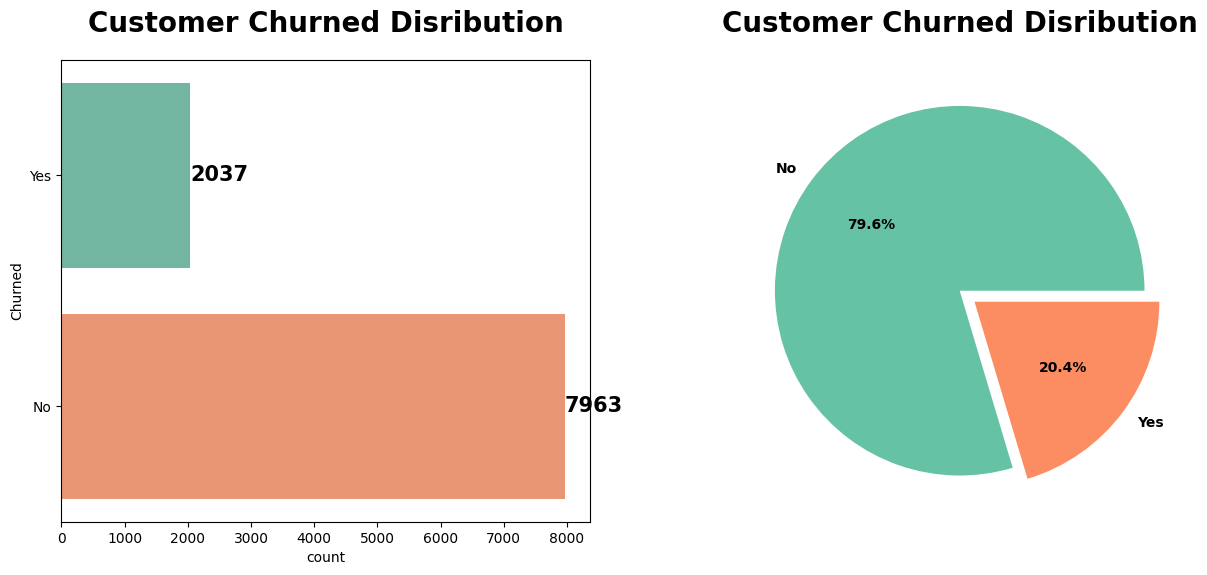

In [309]:
count = df["Churned"].value_counts()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(y ="Churned" ,data = df , hue="Churned",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
ax.bar_label(ax.containers[1],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

* There is **huge class-imbalance** which can lead to **bias in model performance.**
* So to **overcome** this **class-imbalance** we have to use **over-sampling technique** from **SMOTE**.

## 2. Visualizing Customer Churned by Gender.

In [310]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

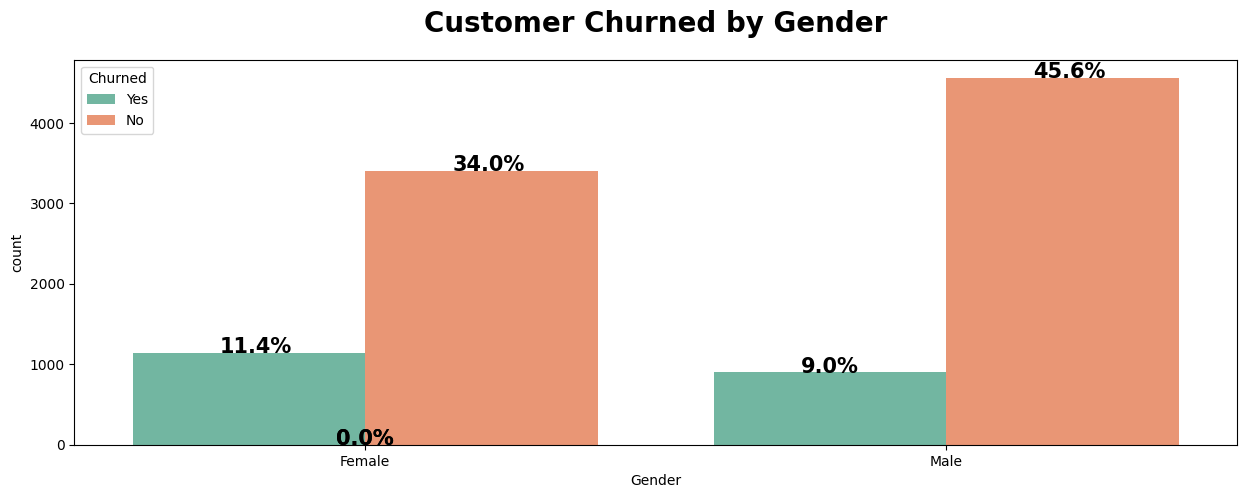

In [311]:
countplot("Gender")

## 3. Visualizing Customer Churned by "NumOfProducts".

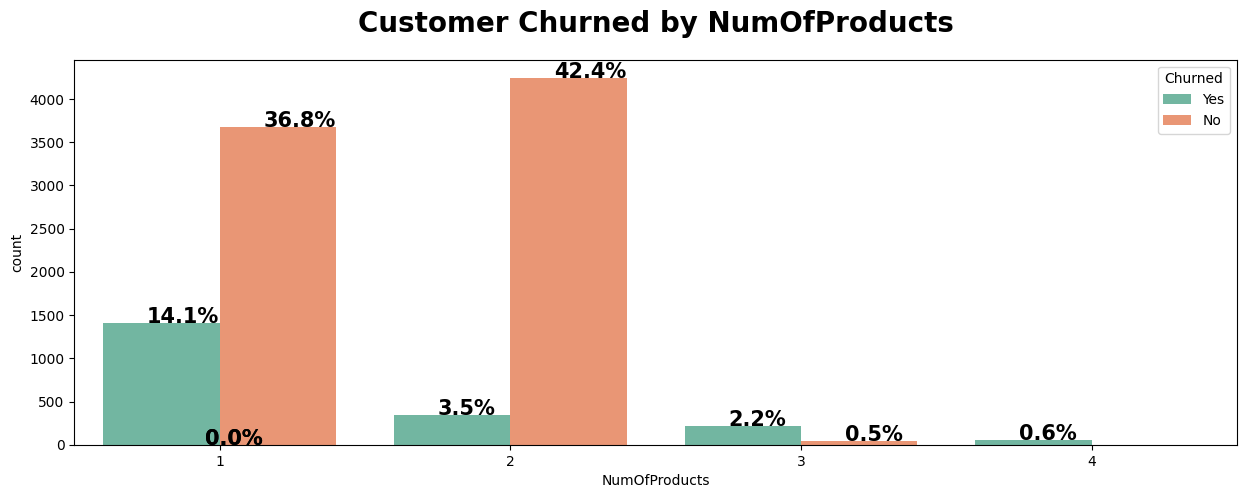

In [312]:
countplot("NumOfProducts")

* **Most** of the customers are having **either 1 or 2** total number of banking products.

* **Very few** customers are having **more than 2** total number of banking products.

* **The lowest churn rate** is with customers having **only 2 products.** 

* There is **very high churn rate** in customers having **1 product** or **more than 2 products.**

* **Note:**

    1. We can do **feature engineering** by **grouping the customers having products more than 2 together** to **reduce the class imbalance.**
    
    2. Because **Class Imbalance** leads to **bias in model** and **misrepresentation of minority class.**

Recommendation:

* The **bank can try to convince the customers** to have **atleast 2 banking products.**

* They can provide **Rewards and Incentives** to the **customers having atleast 2 banking products.**

* There is **approxiamately equal customer** who are **either active or not active.**

* But the **churn rate %** in **not active customers is almost double** compared to **active customers.**

* So **customers which are not active are morely likely to deactivate their banking facilities.**

Recommendation:
    
* Bank can provide **Regular Communication and Updates**, and **Enhanced Digital Services** so that customers remain active to the banking facilities.

## 4. Visualizing Customer Churned by "CreditScore".

In [313]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(y= column,data=df,hue="Churned" ,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

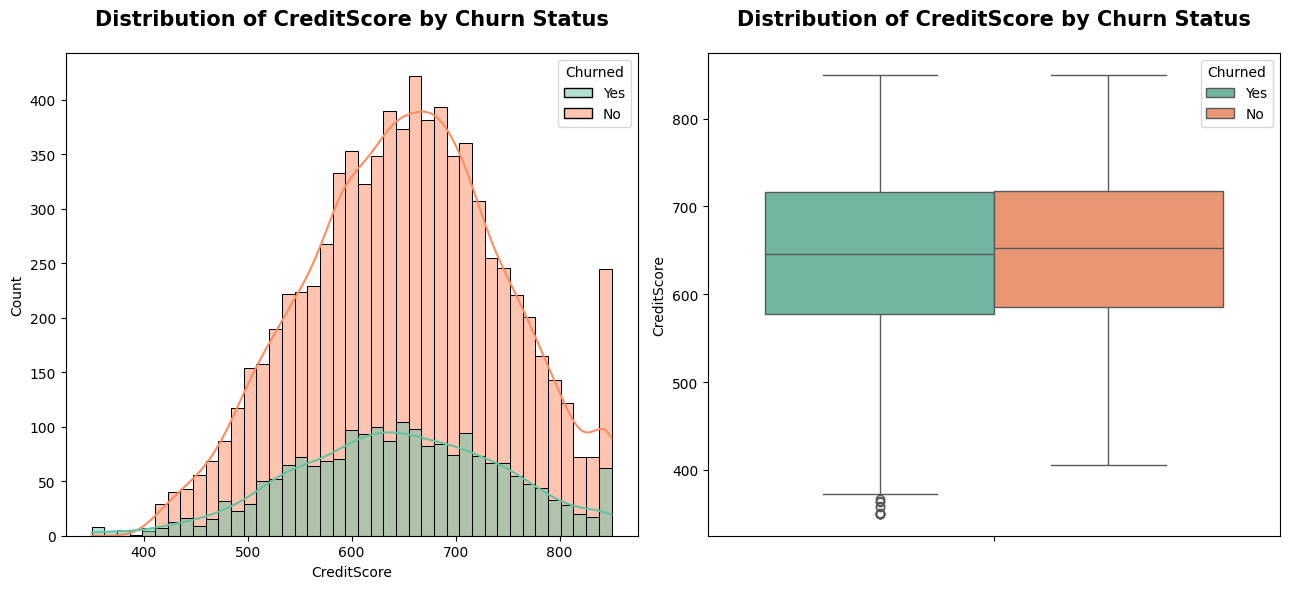

In [314]:
continous_plot("CreditScore")

* The **Median CreditScore** of **both churned** and **not churned** customers are **approxiamately equal.**

* Since the **values are approximately equal** for both **churn status** we can't generate any **relevant inference.**

## 5. Visualizing Customer Churned by "Age".

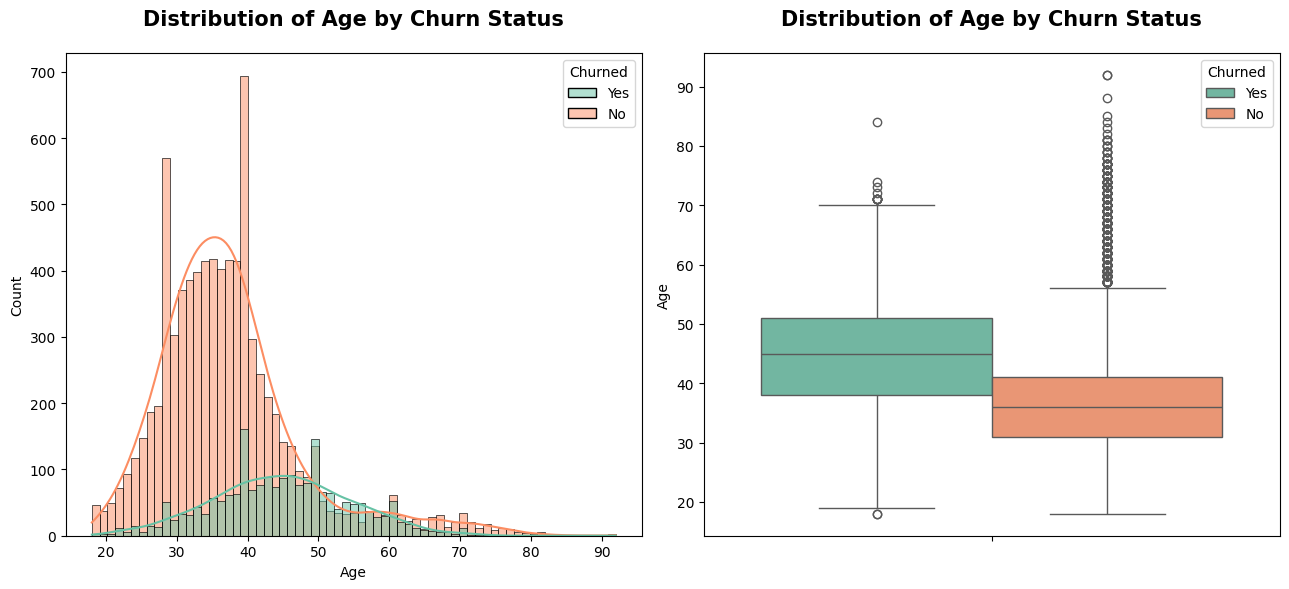

In [315]:
continous_plot("Age")

* The **distribution is right skewed** because of **presence of outliers** which can lead to **overfitting in model.**

* To **overcome this right-skewed distribution** we can use **log normal transformation** technique to bring a **normal distribution.**

## 6. Visualizing Customer Churned by "Balance."

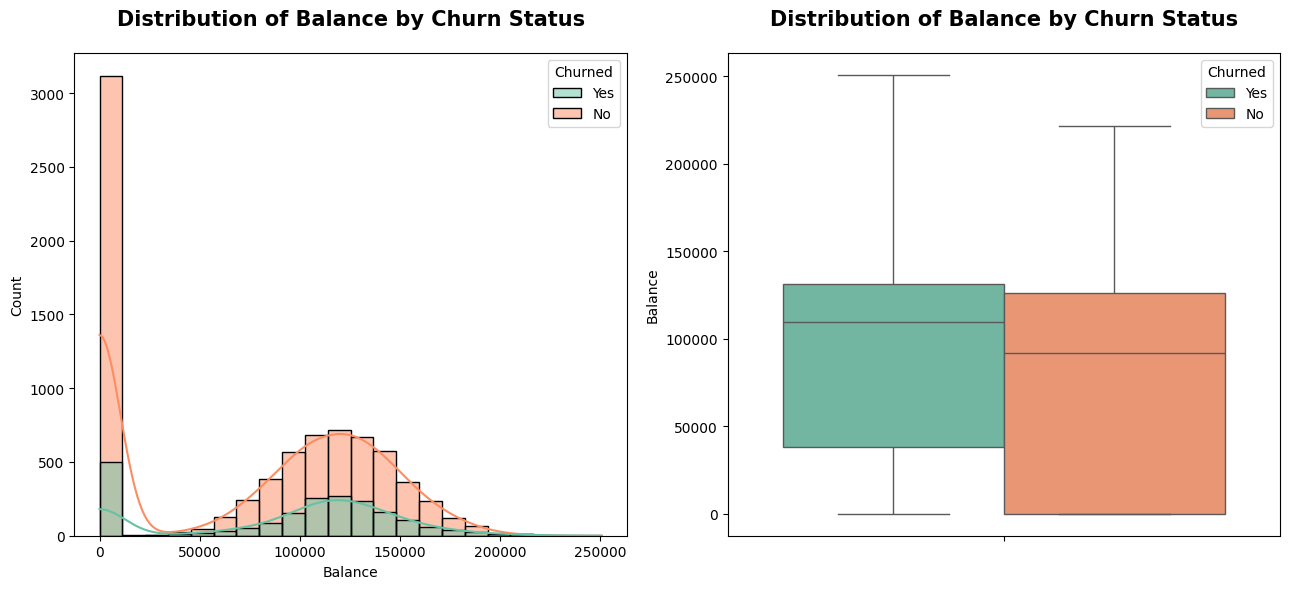

In [316]:
continous_plot("Balance")

* **More than 3000 customers** are having their **account balance equal to zero.**

* Customers with **zero balance** are more likely to **deactivate their account.**

* **Excluding the zero value** we can observe a **normal distribution.** So don't have to use any other techniques.
    
 
 * **Note:-**
    * We can do **Feature Engineering** by **grouping** the customers with account **balance equal to 0** and **balance more than 0 separately.**
    

## 7. Visualizing Customer Churned by "Estimated Salary".

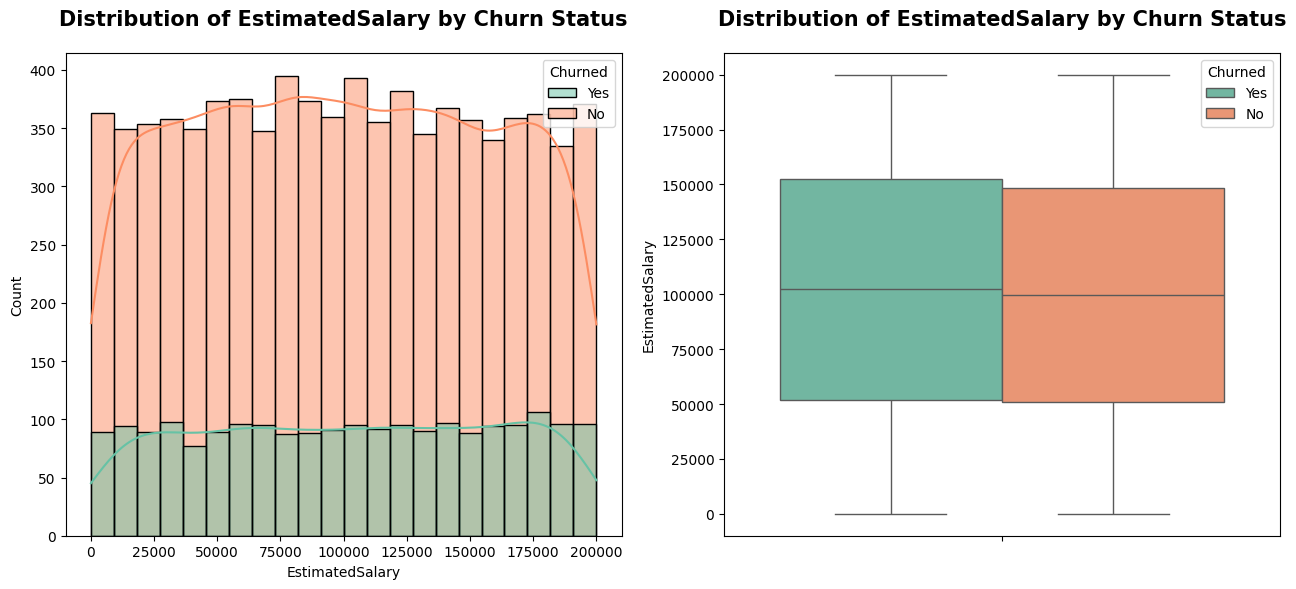

In [317]:
continous_plot("EstimatedSalary")

* The **median value of EstimatedSalary** is **approxiamately same** for both the **churned categories.**
* Since the distribution is **kind of similar** for **both churn category** we can't make any **relevant inference.**

# 5- Feature Engineering

## 1. create new feature from "NumOfProducts" Feature.

In [318]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [319]:
df["Total_Products"] = np.select(conditions,values)

In [320]:
df.drop(columns="NumOfProducts", inplace=True)

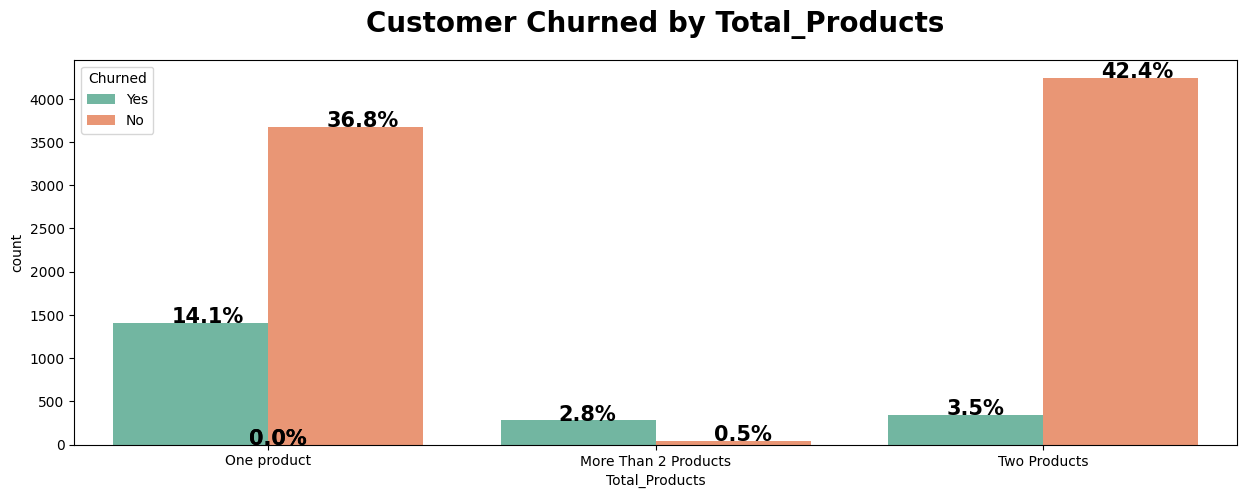

In [321]:
# Visualizing The New Feature "Total_Products"
countplot("Total_Products")

## 2. Creating New Feature From "Balance" Feature.

In [322]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

In [323]:
df["Account_Balance"] = np.select(conditions, values)

In [324]:
df.drop(columns="Balance",inplace=True)

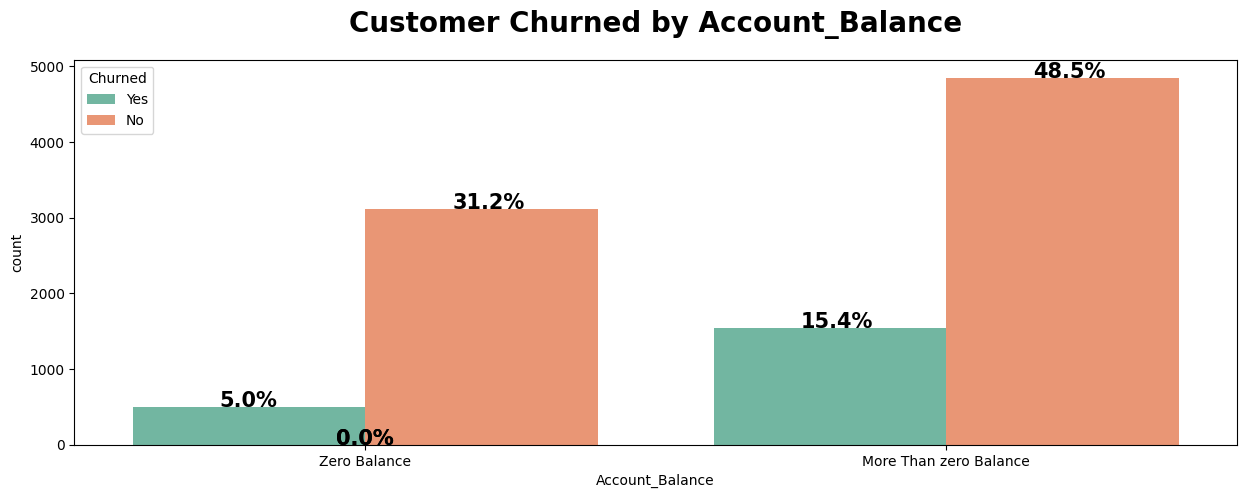

In [325]:
# Visualizing The New Feature "Account_Balance".
countplot("Account_Balance")

# 6- Data preprocessing

In [326]:
num_cols = df.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [327]:
cat_cols = df.select_dtypes(include = 'O').columns.tolist()
cat_cols

['Geography', 'Gender', 'Churned', 'Total_Products', 'Account_Balance']

In [328]:
for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Churned column is: ['Yes' 'No']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



In [329]:
cat_cols.remove('Churned')
cat_cols

['Geography', 'Gender', 'Total_Products', 'Account_Balance']

## 1. Performing Label Encoding on Categorical Features.

In [330]:
encod = LabelEncoder()

In [331]:
for col in cat_cols:
    df[col] = encod.fit_transform(df[col])

## 2.Encoding Target Variable.

In [388]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)
df['Churned'].unique()

array([1, 0], dtype=int64)

In [389]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products,Account_Balance
0,619,0,0,1.318462,2,1,1,101348.88,1,1,1
1,608,2,0,1.311994,1,0,1,112542.58,0,1,0
2,502,0,0,1.318462,8,1,0,113931.57,1,0,0
3,699,0,0,1.298436,1,0,0,93826.63,0,2,1
4,850,2,0,1.324738,2,1,1,79084.10,0,1,0


## 3. Checking Skewness of Continous Features.

In [390]:
cols = ["CreditScore","Age","EstimatedSalary"]
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,-0.046406
EstimatedSalary,0.002085


* **Age Feature** is **highly right-skewed** , which conveys that there is presence of **positive outliers.**

* **Skewness** can **negatively impact** the **performance** of certain machine learning algorithms, like **DecisionTree & Linear Models.**

* To overcome the **right-skewed distribution** we can use **log normal transformation** to achieve a **normal distribution.**

## 4. Performing Log Transformation on Age Column.

In [391]:
#Storing the previous Age values to compare these values with the transformed values.
old_age = df["Age"]     

In [392]:
df["Age"] = np.log(df["Age"])

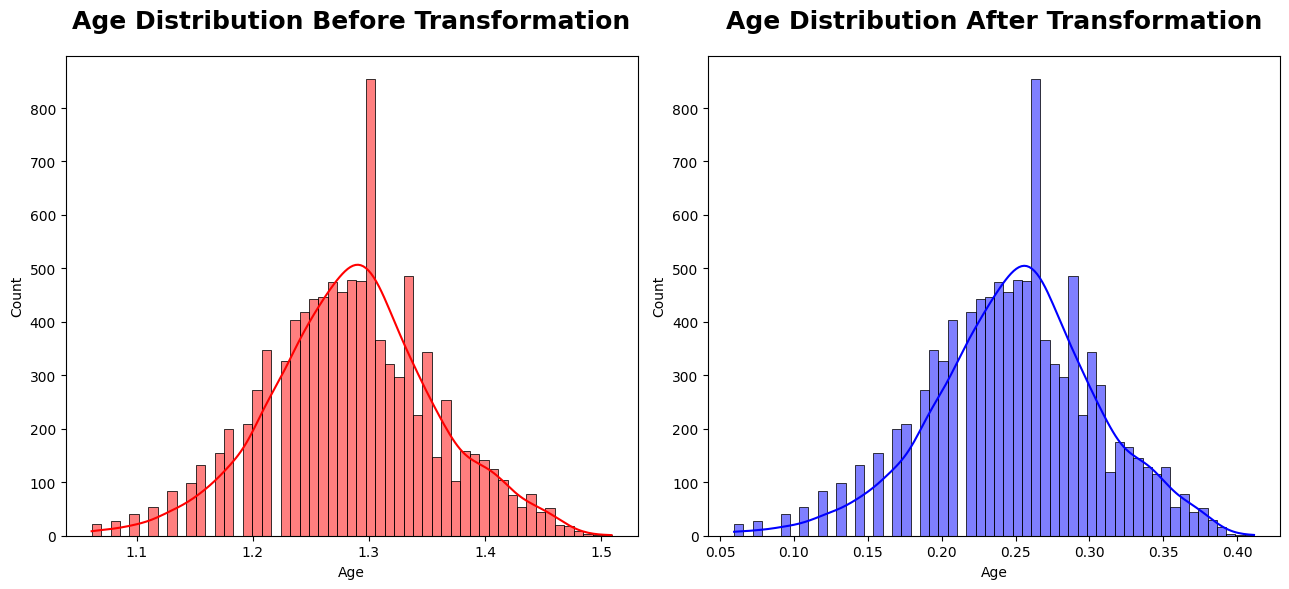

In [393]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age,color="red", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="blue", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

* After applying **log normal transformation** the **age feature has achieved** a **normal distribution.**

* This will **help model** to find more **relevant patterns** and build a more **accurate model.** 

# 7- splitting features and target from dataset

In [394]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

In [395]:
print(f'size of features{X.shape}')
print(f'size of label{y.shape}')

size of features(10000, 10)
size of label(10000,)


In [396]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=0)

In [397]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 10)
Shape of x_test is:  (2000, 10)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


In [398]:
y_test.value_counts()

Churned
0    1593
1     407
Name: count, dtype: int64

In [399]:
y_train.value_counts()

Churned
0    6370
1    1630
Name: count, dtype: int64

# 8- Applying SMOTE 

    to Overcome the Class-Imbalance in Target Variable.

In [400]:
smt = SMOTE(random_state=42)

x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [401]:
print("Shape of x_train after resampling is:",x_train_resampled.shape)
print("Shape of y_train after resampling is:",y_train_resampled.shape)

Shape of x_train after resampling is: (12740, 10)
Shape of y_train after resampling is: (12740,)


In [402]:
y_train_resampled.value_counts().to_frame()

,count
Churned,
1,6370
0,6370


# 9- Training the model

In [403]:
scaler = StandardScaler() # Standardization

# Apply the scaler to the features
x_train_resampled = scaler.fit_transform(x_train_resampled)
x_test = scaler.transform(x_test)

In [404]:
model = LogisticRegression()
# training the Logistic Regression model with the training data
model.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

In [405]:
# prediction on training data

prediction_on_training_data = model.predict(x_train_resampled)
accuracy_on_training_data = accuracy_score(y_train_resampled, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.8336734693877551


In [406]:
# prediction on test data

prediction_on_test_data = model.predict(x_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.7815


In [407]:
cm = confusion_matrix(y_test, prediction_on_test_data)

print(cm)

[[1310  283]
 [ 154  253]]


In [408]:
classification_report(y_test, prediction_on_test_data)

'              precision    recall  f1-score   support\n\n           0       0.89      0.82      0.86      1593\n           1       0.47      0.62      0.54       407\n\n    accuracy                           0.78      2000\n   macro avg       0.68      0.72      0.70      2000\nweighted avg       0.81      0.78      0.79      2000\n'

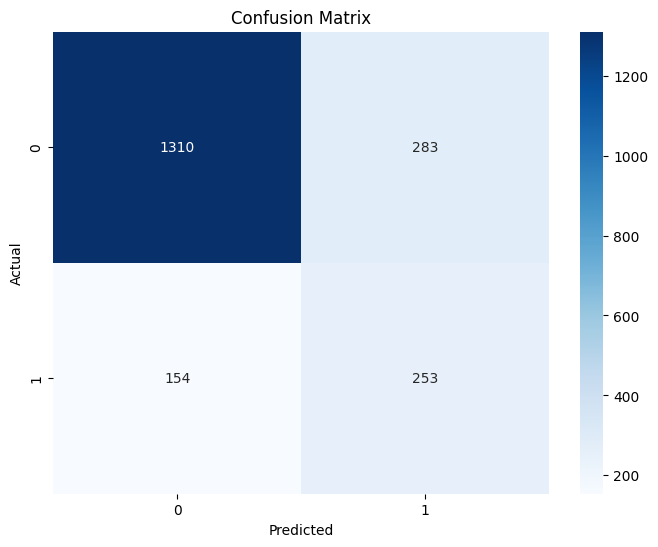

In [409]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [410]:
rf_Recall = recall_score(y_test, prediction_on_test_data)
rf_Precision = precision_score(y_test, prediction_on_test_data)
rf_f1 = f1_score(y_test, prediction_on_test_data)
rf_accuracy = accuracy_score(y_test, prediction_on_test_data)

In [411]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Logistic Regression model', 'output')
rf_score

,Logistic Regression model,Recall,Precision,F1 Score,Accuracy
0,output,0.621622,0.472015,0.536585,0.7815


In [412]:
print("Classification Report:")
print(classification_report(y_test, prediction_on_test_data))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1593
           1       0.47      0.62      0.54       407

    accuracy                           0.78      2000
   macro avg       0.68      0.72      0.70      2000
weighted avg       0.81      0.78      0.79      2000



In [413]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_on_test_data)
auc = roc_auc_score(y_test, prediction_on_test_data)

In [414]:
print(roc_curve(y_test, prediction_on_test_data))

(array([0.        , 0.17765223, 1.        ]), array([0.        , 0.62162162, 1.        ]), array([inf,  1.,  0.]))


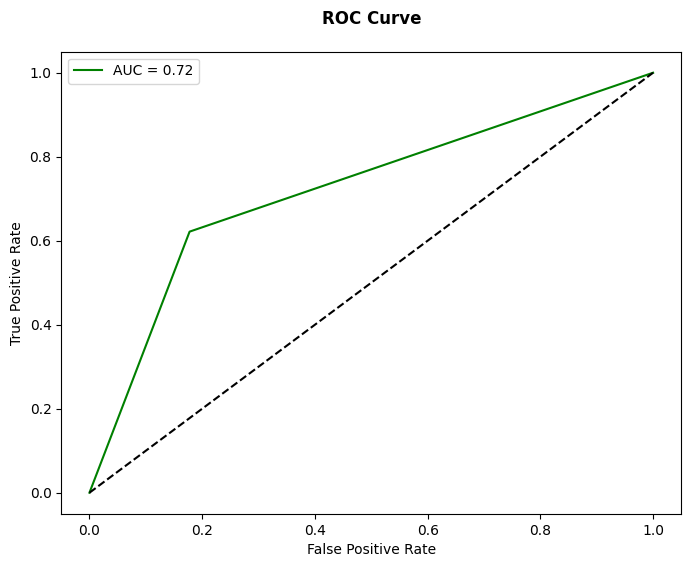

In [415]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

# End :